<a href="https://colab.research.google.com/github/ParichayaHongthongkum/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# K-means

### Generate Data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2,random_state=6)

# Explore data

In [4]:
X.shape

(500, 2)

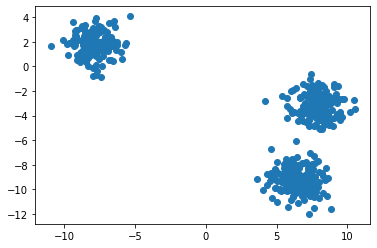

In [5]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

### Clustering

### Import

In [6]:
from sklearn.cluster import KMeans

## Define

In [7]:
kmeans = KMeans(n_clusters=2, random_state=6)

### Fit-Predict

In [8]:
y_clust = kmeans.fit_predict(X)

In [9]:
y_clust

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,

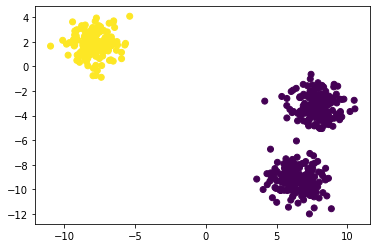

In [10]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

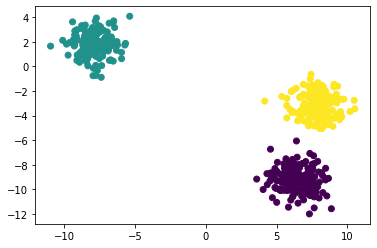

In [11]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

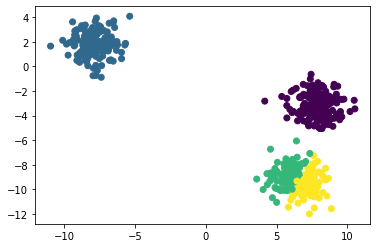

In [12]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

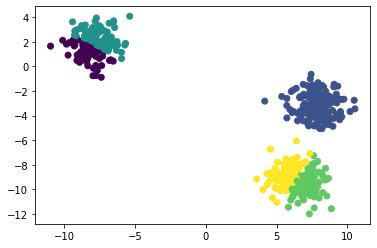

In [13]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

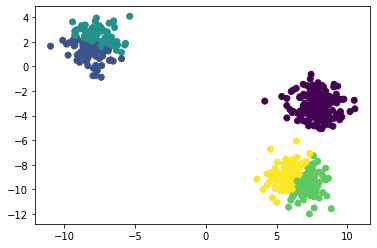

In [14]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

## Example Application (Color Quantization)

In [15]:
import cv2
import os

In [19]:
img = cv2.imread('/content/legiao_SAIZ_vO4JXQt0epNCnL3ayi1h2GPHdKbqB5cYogzMu.jpg.jpeg')

In [20]:
img.shape

(381, 728, 3)

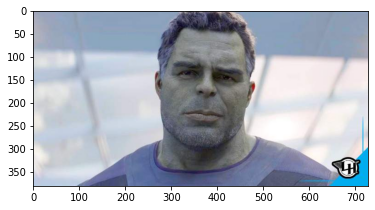

In [21]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

###**นับจำนวนสี**

In [22]:
import numpy as np

In [23]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(36936, 3)

###**จัดกลุ่มสีให้เหลือ 16 สี**

In [24]:
myquantize = KMeans(n_clusters=16,random_state=6)

####**แปลงข้อมูลให้อยู่ในรูป row-column**

In [25]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(277368, 3)

In [26]:
final_color = myquantize.fit_predict(img_row)

###**ใช้ centroid เป็นตัวแทนของสี**

In [27]:
centroid = myquantize.cluster_centers_

In [28]:
centroid

array([[105.47176486, 117.11429123, 158.08502701],
       [226.65673553, 226.68144226, 230.66369079],
       [ 87.73503218,  87.88810511,  92.58954237],
       [142.50684176, 161.49681399, 186.4249857 ],
       [194.49569602, 202.66198352, 214.00178308],
       [ 66.51905778,  65.66233887,  75.40777149],
       [144.05051675, 145.01149323, 153.17026016],
       [128.36971966, 129.36290323, 129.03341014],
       [208.93259027, 213.59861176, 222.39474738],
       [  6.93534813, 171.7096404 , 234.82211171],
       [ 15.2173913 ,  14.37359098,  16.69296833],
       [107.18354389, 109.13719971, 112.65241867],
       [ 45.3005522 ,  43.53760189,  52.30489088],
       [171.41756578, 177.04722695, 190.97870528],
       [ 81.21542338,  89.16341222, 125.27211374],
       [248.09773203, 240.78056525, 240.53217027]])

In [29]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

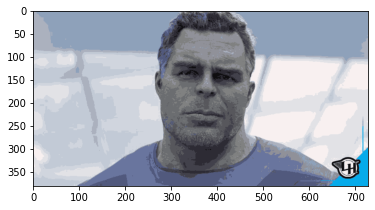

In [30]:
plt.imshow(new_img/255)

In [31]:
plt.imsave('img.jpg',new_img/255)

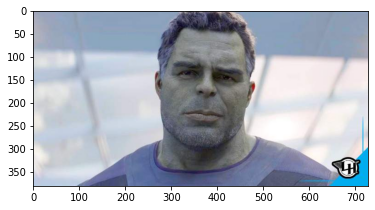

In [32]:
plt.imshow(RGB_img)

##**Hierachical Clustering**

In [ ]:
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

##**Clustering Evaluation**

In [ ]:
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation